# **Customer Segmentation**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
from sklearn.cluster import MiniBatchKMeans


In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')

In [ ]:
dataset.head(10) 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# Data Preprocessing

In [ ]:
dataset.shape

(200, 5)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data Transformation

In [ ]:
dataset.Gender.replace('Male', 0, inplace=True)
dataset.Gender.replace('Female', 1, inplace=True)
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


# ** **Data Visualization ****

## Gender Distribution

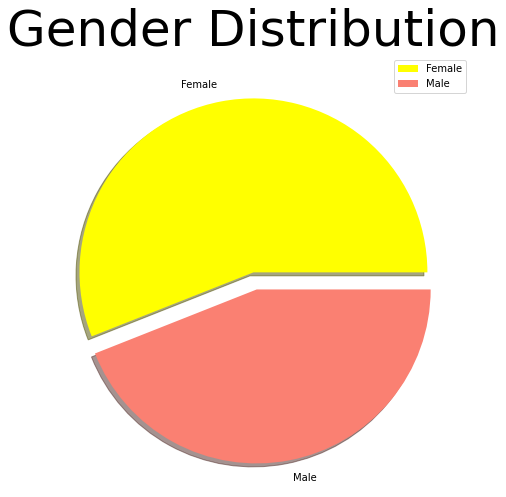

From the chart, we can see that 56% of our customers are female and the rest are male.


In [ ]:
labels = ['Female', 'Male']
size = dataset['Gender'].value_counts()
colors = ['yellow', 'salmon']
explode = [0, 0.1]
 
plt.rcParams['figure.figsize'] = (15, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('Gender Distribution', fontsize = 50)
plt.axis('off')
plt.legend()
plt.show()

print('From the chart, we can see that 56% of our customers are female and the rest are male.')

### Number of customer and age distribution



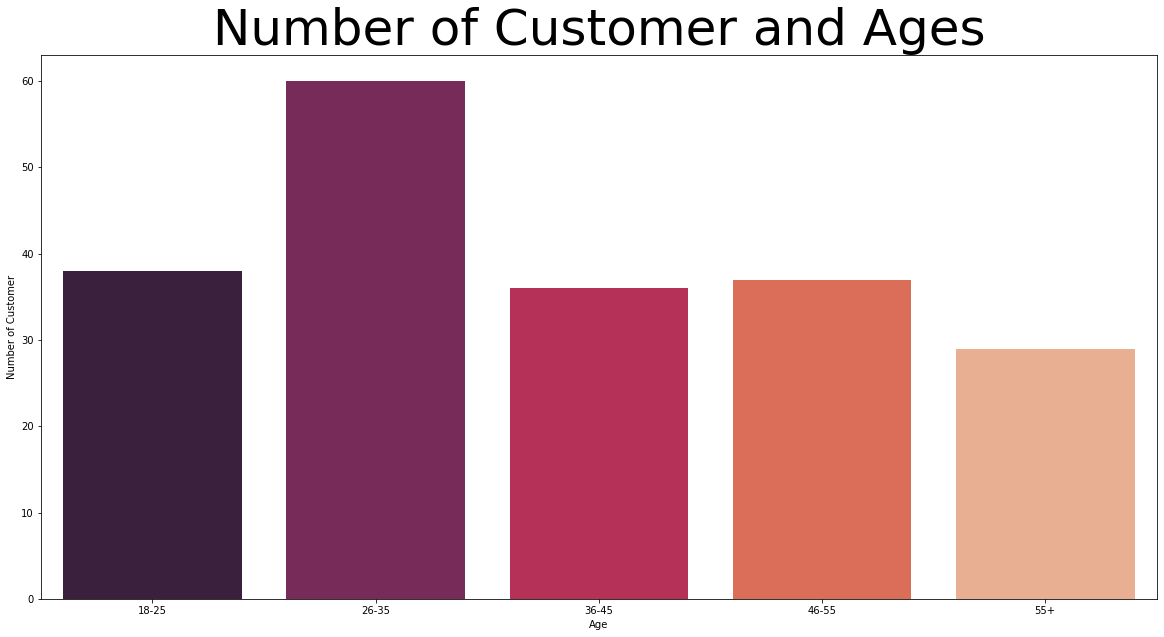

In [ ]:
age18_25 = dataset.Age[(dataset.Age <= 25) & (dataset.Age >= 18)]
age26_35 = dataset.Age[(dataset.Age <= 35) & (dataset.Age >= 26)]
age36_45 = dataset.Age[(dataset.Age <= 45) & (dataset.Age >= 36)]
age46_55 = dataset.Age[(dataset.Age <= 55) & (dataset.Age >= 46)]
age55above = dataset.Age[dataset.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(20,10))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages",fontsize = 50)
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

### Age Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


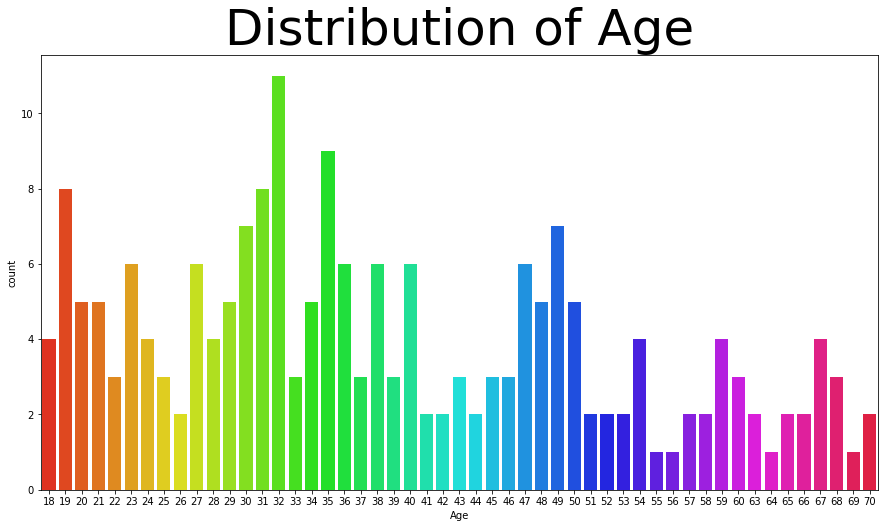

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(dataset['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 50)

plt.show()

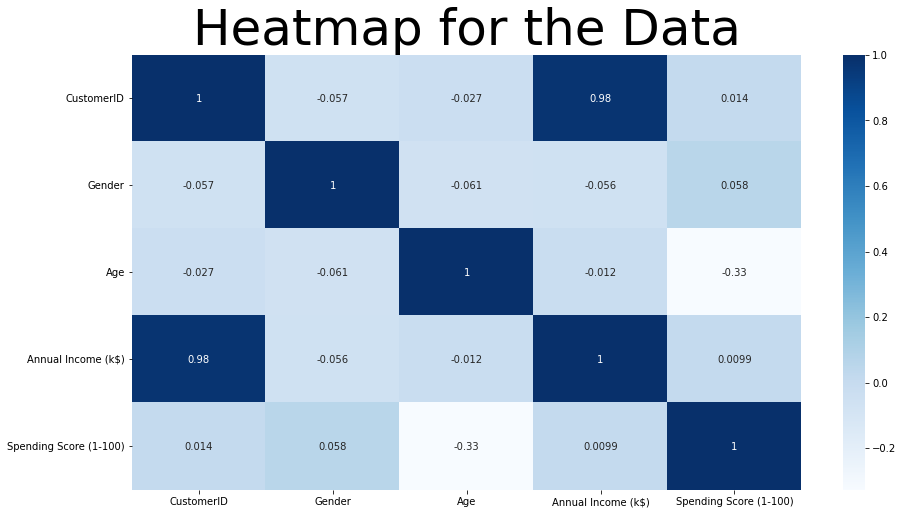

In [ ]:
sns.heatmap(dataset.corr(), cmap = 'Blues', annot = True)
plt.title('Heatmap for the Data', fontsize = 50)
plt.show()

# Feature selection

In [ ]:
### Feature slection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= dataset.iloc[:, [3,4]].values

### Mini Batch kmeans algorithm

In [ ]:
wcss1=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    mbk = MiniBatchKMeans(n_clusters= i, init='random', random_state=0)
    mbk.fit(X)
    wcss1.append(mbk.inertia_)

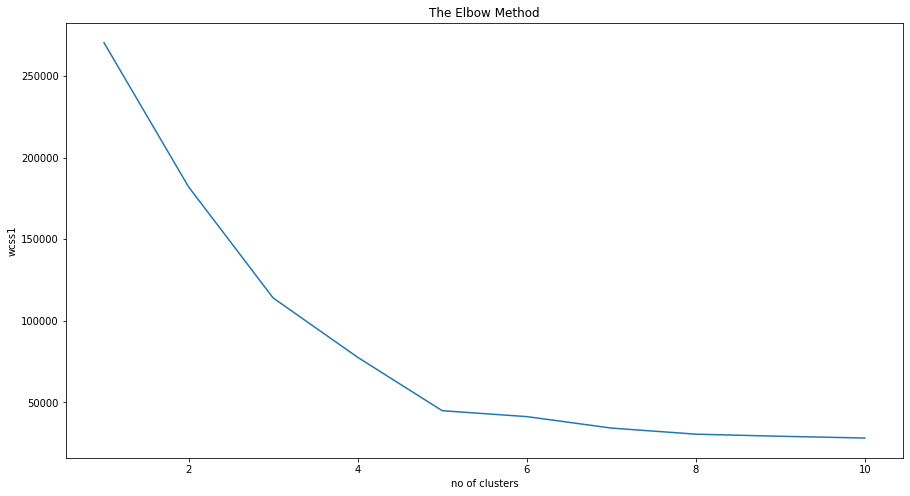

In [ ]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss1)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss1')
plt.show()

In [ ]:
mbk = MiniBatchKMeans(init ='random', n_clusters = 5,
                      batch_size = 100)
dataset["Cluster"] = mbk.fit_predict(X)
dataset["Cluster"] = dataset["Cluster"].astype("int")
print(dataset.head(20))

    CustomerID  Gender  ...  Spending Score (1-100)  Cluster
0            1       0  ...                      39        0
1            2       0  ...                      81        4
2            3       1  ...                       6        0
3            4       1  ...                      77        4
4            5       1  ...                      40        0
5            6       1  ...                      76        4
6            7       1  ...                       6        0
7            8       1  ...                      94        4
8            9       0  ...                       3        0
9           10       1  ...                      72        4
10          11       0  ...                      14        0
11          12       1  ...                      99        4
12          13       1  ...                      15        0
13          14       1  ...                      77        4
14          15       0  ...                      13        0
15          16       0  

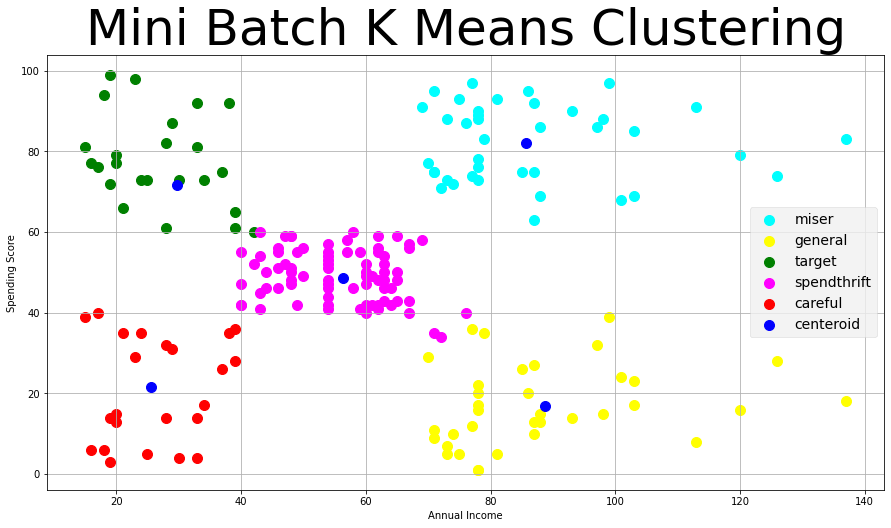

In [ ]:
mbk = MiniBatchKMeans(n_clusters = 5, init = 'random', max_iter = 300,batch_size = 100, n_init = 10, random_state = 0)
y_means = mbk.fit_predict(X)

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'cyan', label = 'miser')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'green', label = 'target')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'red', label = 'careful')
plt.scatter(mbk.cluster_centers_[:,0], mbk.cluster_centers_[:, 1], s = 100, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Mini Batch K Means Clustering', fontsize = 50)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [ ]:
mbk.inertia_

46021.56484754494

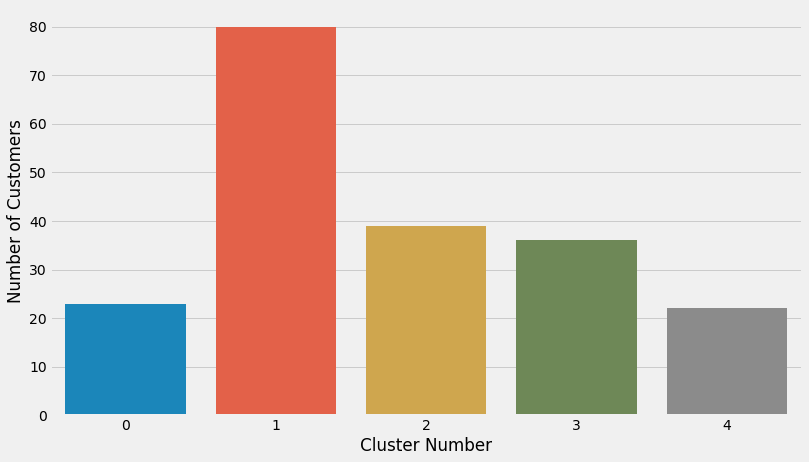

In [ ]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=dataset.groupby(['Cluster']).count()['CustomerID'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of Customers")

In [ ]:
###Model Interpretation 
#Cluster 1 (Red Color) -> earning high but spending less
#cluster 2 (Blue Colr) -> average in terms of earning and spending 
#cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]
#cluster 4 (cyan Color) -> earning less but spending more
#Cluster 5 (magenta Color) -> Earning less , spending less


##### We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these re easy to converse ######
#wherein others we can set like once in a week or once in a month

